In this code I test the most important Constraint Satisfaction Problem (CSP) algorithms. Scroll to the end for a full discussion.

an example of a 'country':...


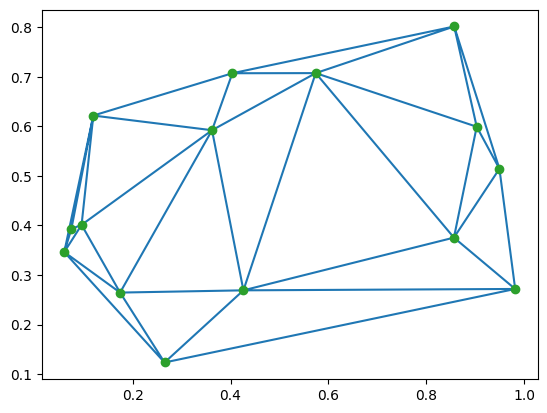

In [6]:
import random
import matplotlib.pyplot as plt 
from scipy.spatial import Delaunay
import numpy as np
from csp import *
import time

class ColorMap:
    def __init__(self, N):
        self.N = N
        self.points = np.array([[random.uniform(0,1),random.uniform(0,1)] for _ in range(self.N)])
        self.tri = Delaunay(self.points)

    def obtain_neighbours(self, pindex):
        neighbors = list()
        for simplex in self.tri.simplices:
            if pindex in simplex:
                neighbors.extend([simplex[i] for i in range(len(simplex)) if simplex[i] != pindex])

        return list(set(neighbors))

    def create_csp_neighbour_dictionary(self):
        D = {}
        for i in range(self.N):
            D[i] = self.obtain_neighbours(i)
        return D
    
    def display_points(self):
        plt.triplot(self.points[:,0], self.points[:,1], self.tri.simplices)
        plt.plot(self.points[:,0], self.points[:,1], 'o')
        plt.show()

color_map = ColorMap(15)
print("an example of a 'country':...")
color_map.display_points()

First we look for solutions only using three colors: 'RGB'. Having run the code a few times already, I have reduced the number of experiments for min_conflicts to 10 from 30. You will see in the results below that even with this reduction min_conflicts takes a long long time with three colors.

In [22]:
t0 = time.time()
for i in range(10):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGB'), DD)
    solution = min_conflicts(mccsp)
t1 = time.time()

print("min_conflicts", t1 - t0)

t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGB'), DD)
    solution = backtracking_search(mccsp)
t1 = time.time()

print("backtracking_search", t1 - t0)

t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGB'), DD)
    solution = backtracking_search(mccsp, order_domain_values=lcv, select_unassigned_variable=mrv, inference=forward_checking)
t1 = time.time()

print("backtracking_search with forward_checking", t1 - t0)


t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGB'), DD)
    solution = backtracking_search(mccsp, order_domain_values=lcv, select_unassigned_variable=mrv, inference=mac)
t1 = time.time()

print("backtracking_search with mac", t1 - t0)

min_conflicts 834.1865880489349
backtracking_search 2.2875959873199463
backtracking_search with forward_checking 0.3767368793487549
backtracking_search with mac 0.7735340595245361


As we can see from the results above, min conflicts takes over 10 minutes! We save an in-depth discussion until the end of the notebook. 

Second we run the code seeking solutions using 'RGBY':

In [21]:
t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGBY'), DD)
    solution = min_conflicts(mccsp)
t1 = time.time()

print("min_conflicts", t1 - t0)

t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGBY'), DD)
    solution = backtracking_search(mccsp)
t1 = time.time()

print("backtracking_search", t1 - t0)

t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGBY'), DD)
    solution = backtracking_search(mccsp, order_domain_values=lcv, select_unassigned_variable=mrv, inference=forward_checking)
t1 = time.time()

print("backtracking_search with forward_checking", t1 - t0)


t0 = time.time()
for i in range(30):
    color_map = ColorMap(15)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGBY'), DD)
    solution = backtracking_search(mccsp, order_domain_values=lcv, select_unassigned_variable=mrv, inference=mac)
t1 = time.time()

print("backtracking_search with mac", t1 - t0)

min_conflicts 0.6493396759033203
backtracking_search 0.8865249156951904
backtracking_search with forward_checking 0.2720656394958496
backtracking_search with mac 0.49202704429626465


On trying the code on larger problems the trent continues...

In [13]:
t0 = time.time()
for i in range(50):
    color_map = ColorMap(30)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGBY'), DD)
    solution = backtracking_search(mccsp, order_domain_values=lcv, select_unassigned_variable=mrv, inference=forward_checking)
t1 = time.time()

print("backtracking_search with forward_checking", t1 - t0)


t0 = time.time()
for i in range(50):
    color_map = ColorMap(30)
    DD = color_map.create_csp_neighbour_dictionary()
    mccsp = MapColoringCSP(list('RGBY'), DD)
    solution = backtracking_search(mccsp, order_domain_values=lcv, select_unassigned_variable=mrv, inference=mac)
t1 = time.time()

print("backtracking_search with mac", t1 - t0)

backtracking_search with forward_checking 1.6800537109375
backtracking_search with mac 2.219569444656372
